## This is continuation of my learning on Dog and Cat dataset from Kaggle. Previously I have trained model on simple neural network, Basic CNN and CNN with Augmented data. 

Now the idea is to use bottleneck features of existing pre trained big model like VGG-16. Almost all the articles available on internet have used pre existing `ImageDataGenerator()` class. ImageDataGenerator needs training data into separate sub-folders according to the classes. 
Even if I only have two classes here, I am not willing to create separate folders for `dogs` and `cats` and put images manually into them. So, I cannot use ImageDataGenerator class here! (That is what I think and what I found on internet!!)

So, I am planning to create my pipeline as below.

    1. Read train images with either Keras methods or opencv and store them in numpy array
    2. Store labels accordingly.
    3. Create VGG16 with include_top = False
    4. 

In [1]:
import keras
import cv2
import numpy as np
import cv2
import os
import glob
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation,Dropout
from keras.optimizers import SGD
from keras.layers import Dense
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras import applications

In [3]:
def image_to_features(image,size=(224,224)):
    return cv2.resize(image,size)

In [4]:
img_dir = "C:/Users/shk1ply/tensor/train" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
labels = []
for (i,f1) in enumerate(files):
    img = cv2.imread(f1)
    features = image_to_features(img)
    data.append(features)
    label = f1.split(os.path.sep)[-1].split(".")[0]
    labels.append(label)
    # show an update every 1,000 images
    if i > 0 and i % 1000 == 0:
        print("[INFO] processed {}/{}".format(i, len(f1)))
        



[INFO] processed 1000/43
[INFO] processed 2000/43
[INFO] processed 3000/42
[INFO] processed 4000/42
[INFO] processed 5000/42
[INFO] processed 6000/42
[INFO] processed 7000/42
[INFO] processed 8000/42
[INFO] processed 9000/42
[INFO] processed 10000/42
[INFO] processed 11000/42
[INFO] processed 12000/42
[INFO] processed 13000/43
[INFO] processed 14000/43
[INFO] processed 15000/43
[INFO] processed 16000/42
[INFO] processed 17000/42
[INFO] processed 18000/42
[INFO] processed 19000/42
[INFO] processed 20000/42
[INFO] processed 21000/42
[INFO] processed 22000/42
[INFO] processed 23000/42
[INFO] processed 24000/42


In [5]:
print (len(data))
print (len(labels))

25000
25000


In [5]:

data = np.array(data,dtype=np.uint8)
labels = np.array(labels)

print (data.shape)
print (labels.shape)

(25000, 224, 224, 3)
(25000,)


In [6]:
(trainData, valData, trainLabels, valLabels) = train_test_split(data, labels, test_size=0.25, random_state=42)

print (trainData.shape)
print (trainLabels.shape)
print (valData.shape)
print (valLabels.shape)


(18750, 224, 224, 3)
(18750,)
(6250, 224, 224, 3)
(6250,)


In [28]:
print (trainLabels[1:500])

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 

In [7]:
#Integer Encoding
le = preprocessing.LabelEncoder()
trainlabels_integer_encoded = le.fit_transform(trainLabels)
valLabels_integer_encoded = le.fit_transform(valLabels)

trainData = trainData.astype('float32')
valData = valData.astype('float32')

trainData /= 255
valData /= 255

trainLabels = keras.utils.to_categorical(trainlabels_integer_encoded,2)
valLabels = keras.utils.to_categorical(valLabels_integer_encoded,2)

print (trainData.shape)
print (trainLabels.shape)
print (valData.shape)
print (valLabels.shape)

(18750, 224, 224, 3)
(18750, 2)
(6250, 224, 224, 3)
(6250, 2)


Now as mentioned above, the idea is to save the bottleneck features and then load it and train just the classifier on it.

In [9]:
#First load the VGG16 model
model = applications.VGG16(weights='imagenet',include_top = False)


In [10]:
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [11]:
bottleneck_features_train = model.predict(trainData,batch_size=16,verbose=1)
bottleneck_features_validation = model.predict(valData,batch_size=16,verbose=1)

print (bottleneck_features_train.shape)
print (bottleneck_features_validation.shape)

6250/6250 [==============================] - 3085s 494ms/step
(18750, 7, 7, 512)
(6250, 7, 7, 512)


In [ ]:
np.save('bottleneck_features_train1.npy',bottleneck_features_train)
np.save('bottleneck_features_validation1.npy',bottleneck_features_validation)


I could have directly use and train the FC model without saving and loading the weights. But I wanted to explore this concept!!

In [8]:
train_data = np.load('bottleneck_features_train1.npy')
validation_data = np.load('bottleneck_features_validation1.npy')


In [20]:
print (train_data.shape)

(18750, 8, 8, 2048)


In [9]:
#A simple Network architecture
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))



In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33554688  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 33,555,202
Trainable params: 33,555,202
Non-trainable params: 0
_________________________________________________________________


In [10]:
#Compiling the model with cross entropy loss and Adadelta optimizer
#model.compile(loss="binary_crossentropy",optimizer=keras.optimizers.SGD(lr=0.0001),metrics=['accuracy'])
model.compile(loss="binary_crossentropy",optimizer=keras.optimizers.SGD(lr=0.001,momentum=0.9),metrics=['accuracy'])

In [11]:
batch_size = 32
epochs = 4
#Actual training the model
history = model.fit(train_data, trainLabels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,validation_data=(validation_data, valLabels))

Train on 18750 samples, validate on 6250 samples
Epoch 1/4
18750/18750 [==============================] - 145s 8ms/step - loss: 0.0562 - acc: 0.9827 - val_loss: 0.0289 - val_acc: 0.9909
Epoch 2/4
18750/18750 [==============================] - 117s 6ms/step - loss: 0.0220 - acc: 0.9928 - val_loss: 0.0286 - val_acc: 0.9915
Epoch 3/4
18750/18750 [==============================] - 116s 6ms/step - loss: 0.0138 - acc: 0.9955 - val_loss: 0.0284 - val_acc: 0.9914
Epoch 4/4
18750/18750 [==============================] - 117s 6ms/step - loss: 0.0083 - acc: 0.9977 - val_loss: 0.0308 - val_acc: 0.9920


dict_keys(['acc', 'val_loss', 'loss', 'val_acc'])


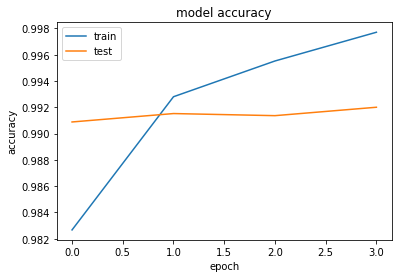

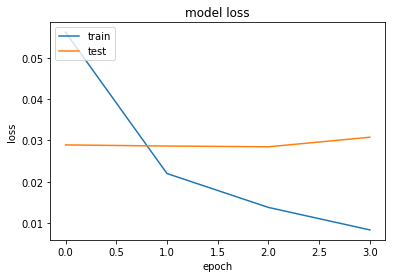

In [12]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
model.save('dogs_and_cats_CNN_custom_bottleneck1_from_part2.h5')

In [14]:
# show the accuracy on the testing set
print("[INFO] evaluating on testing set...")
(loss, accuracy) = model.evaluate(validation_data, valLabels,batch_size=128, verbose=1)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
 
# dump the network architecture and weights to file
#print("[INFO] dumping architecture and weights to file...")


[INFO] evaluating on testing set...
6250/6250 [==============================] - ETA:  - 11s 2ms/step
[INFO] loss=0.0308, accuracy: 99.2000%


# Test 

In [18]:
# initialize the class labels for the Kaggle dogs vs cats dataset
CLASSES = ["cat", "dog"]
 
# load the network
print("[INFO] loading network architecture and weights...")
model = load_model('dogs_and_cats_CNN_custom_bottleneck1_from_part2.h5')
#print("[INFO] testing on images in {}".format(args["test_images"]))
#Testing on one test image
test_image = cv2.imread('C:/Users/shk1ply/tensor/test1/3220.jpg')
test_features = image_to_features(test_image)/255.0
test_features = np.array([test_features])
probs = model.predict(test_features)[0]
print (probs)
#Just for printing actual return shape of predict method
prb = model.predict(test_features)
print (prb)
prediction = probs.argmax(axis=0)
print (prediction)
test_label = "{}: {:.2f}%".format(CLASSES[prediction],probs[prediction] * 100)
cv2.putText(test_image, test_label, (10, 35), cv2.FONT_HERSHEY_SIMPLEX,1.0, (0, 255, 0), 3)

plt.imshow(test_image,cmap='gray')
plt.show()
print("[INFO] Predicted: {}, Actual: {}".format(prediction,np.argmax(test_label)))



[INFO] loading network architecture and weights...


ValueError: Error when checking input: expected flatten_1_input to have shape (8, 8, 2048) but got array with shape (224, 224, 3)